In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
rng = np.random.RandomState(1)
x = np.dot(rng.rand(2,2),rng.randn(2,200)).T

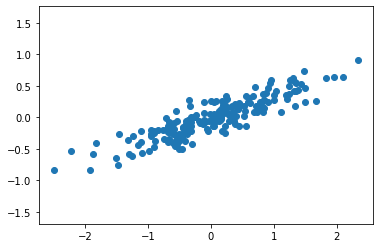

In [43]:
plt.scatter(x[:,0],x[:,1])
plt.axis("equal")
plt.show()

In [44]:
#pca
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [45]:
pca.components_


array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

In [46]:
pca.explained_variance_

array([0.7625315, 0.0184779])

In [47]:
pca.explained_variance_ratio_

array([0.97634101, 0.02365899])

In [55]:
# let’s visualize them as vectors over the input data, using the “components” to define the direction of the vector, and the “explained variance” to
#define the squared-length of the vecto
def draw_vector(v,v1,ax=None):
    ax=ax or plt.gca()
    arrowprops = dict(arrowstyle='->',
                     linewidth=2,shrinkA=0,shrinkB=0)
    ax.annotate('',v1,v,arrowprops=arrowprops)
    

    

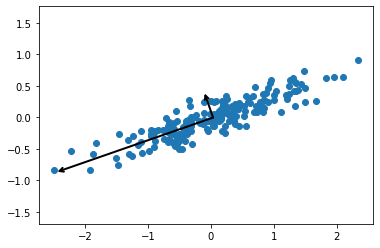

In [56]:
plt.scatter(x[:,0],x[:,1])
for length,vector in zip(pca.explained_variance_, pca.components_):
    v = vector*3*np.sqrt(length)
    draw_vector(pca.mean_,pca.mean_+v)
plt.axis('equal')
plt.show()

In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(x)
x_pca = pca.transform(x)

In [59]:
x.shape,x_pca.shape

((200, 2), (200, 1))

(-2.77152878069022, 2.661757596590676, -0.9964674432667124, 1.0219081775900811)

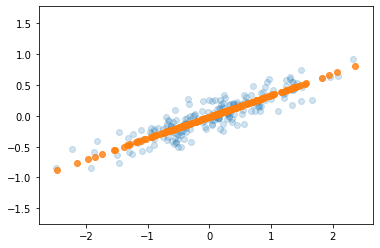

In [62]:
X_new = pca.inverse_transform(x_pca)#retained original   
plt.scatter(x[:, 0], x[:, 1], alpha=0.2)       
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)       
plt.axis('equal')

In [63]:

from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

In [64]:
X = digits.data # as mention it have 64 dim
X.shape

(1797, 64)

In [65]:
y = digits.target
y.shape

(1797,)

In [67]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)## we convert 64 dim data to
pca.fit(X)
x_pca = pca.transform(X)

In [69]:
pca.explained_variance_

array([179.0069301 , 163.71774688])

In [71]:
pca.components_

array([-2.75592149e-17, -1.01064585e-02, -4.90849153e-02, -9.43338763e-03,
       -5.36015690e-02, -1.17755318e-01, -6.21282032e-02, -7.93575344e-03,
       -1.63216230e-04, -2.10167139e-02,  6.03485581e-02, -5.33776339e-03,
       -9.19770251e-02, -5.19210468e-02, -5.89354937e-02, -3.33284145e-03,
       -4.22873533e-05,  3.62458368e-02,  1.98257354e-01, -4.86386611e-02,
       -2.25574881e-01, -4.50540320e-03,  2.67696407e-02, -2.08739255e-04,
       -5.66234588e-05,  7.71235185e-02,  1.88447125e-01, -1.37952519e-01,
       -2.61042714e-01,  4.98350404e-02,  6.51113353e-02,  4.03198967e-05,
       -0.00000000e+00,  8.81560223e-02,  8.71737406e-02, -2.70860258e-01,
       -2.85291778e-01,  1.66461574e-01,  1.27860524e-01, -0.00000000e+00,
        2.89440769e-04,  5.08305371e-02,  1.30274520e-01, -2.68906478e-01,
       -3.01575484e-01,  2.40259065e-01,  2.17555534e-01,  1.32726011e-03,
        2.86743086e-04,  1.05548468e-02,  1.53370739e-01, -1.19535233e-01,
       -9.72508263e-02,  

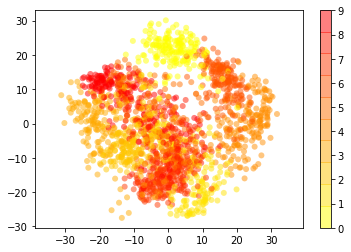

In [78]:
plt.scatter(x_pca[:, 0], x_pca[:, 1],c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('autumn_r', 10)) 
plt.colorbar()
plt.axis('equal')
plt.show()